In [ ]:
#!pip install -r requirements.txt

In [1]:
import os,time,cv2

import numpy as np
import torch.utils.data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as T

# 用于记录日志
import logging
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import torch.optim as optim

from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.utils import make_grid

# Data manipulations
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt

# helpers
import glob
import os
import copy
import time
import csv
from tqdm import tqdm  # 导入 tqdm
#from google.colab import drive
from model import AttentionUNet
import os
from torch.utils.data import Dataset


from main import get_data_loaders,train_and_test,FocalLoss,get_testMDvsFAdata_loaderst,testMDvsFA_model,visualize_predictions,get_testSRISTdata_loaderst,testSRIST_model
from model import AttentionUNet

In [4]:
batch_size=4
bpath = '.'


## 测试MDvsFA

Mode: test, Number of image-mask pairs: 100
Mode: test, Number of image-mask pairs: 100
Test Loss: -0.0006
Test F1 Score: 0.5569


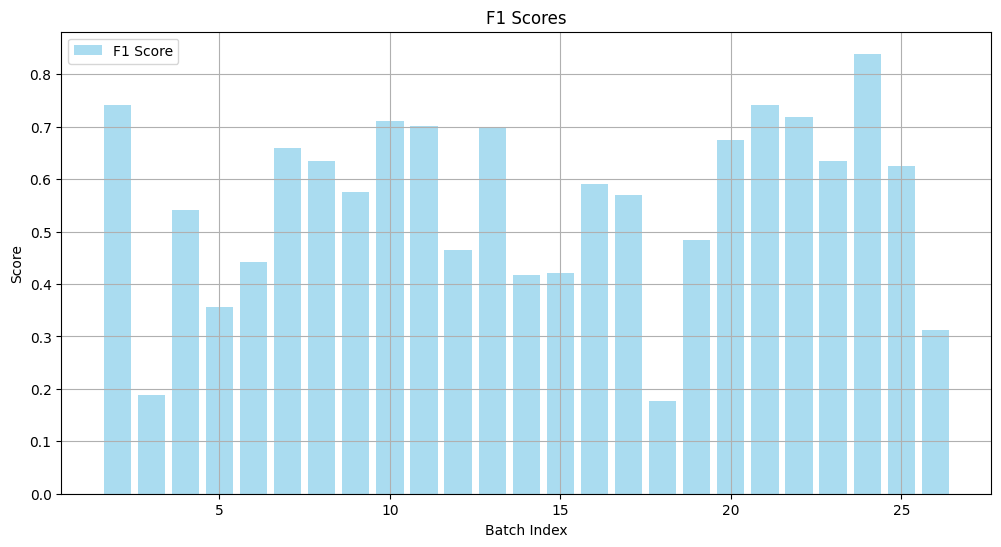

<Figure size 1200x400 with 0 Axes>

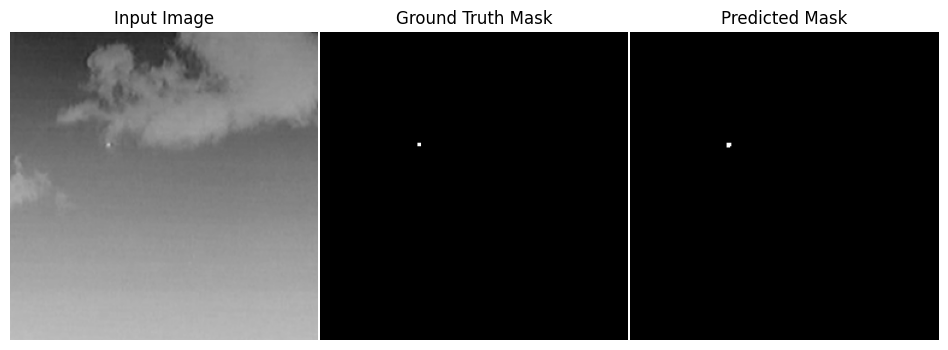

<Figure size 1200x400 with 0 Axes>

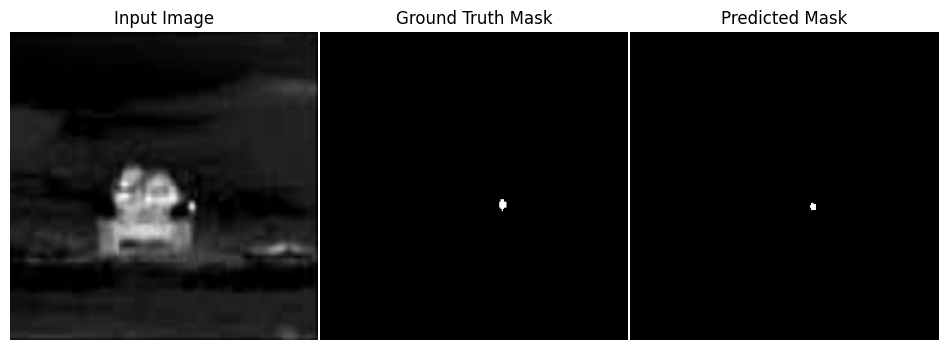

<Figure size 1200x400 with 0 Axes>

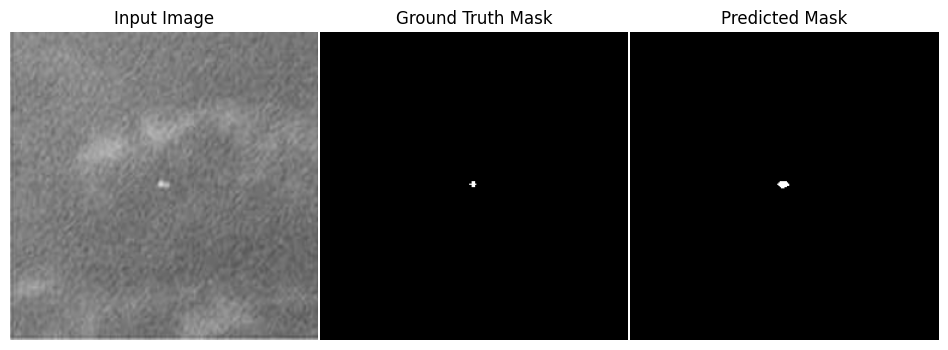

<Figure size 1200x400 with 0 Axes>

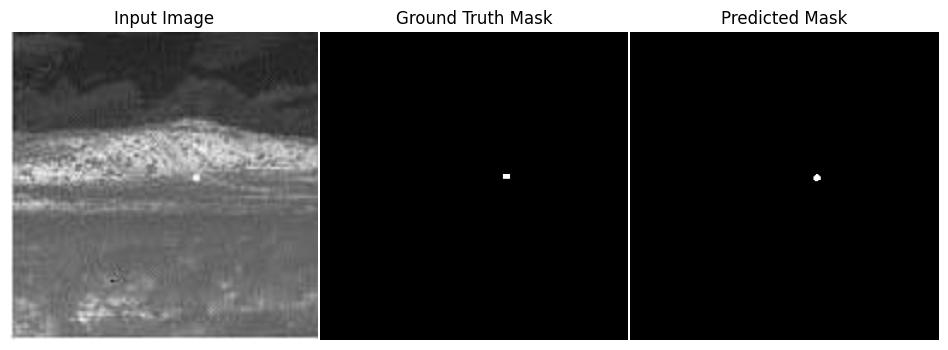

<Figure size 1200x400 with 0 Axes>

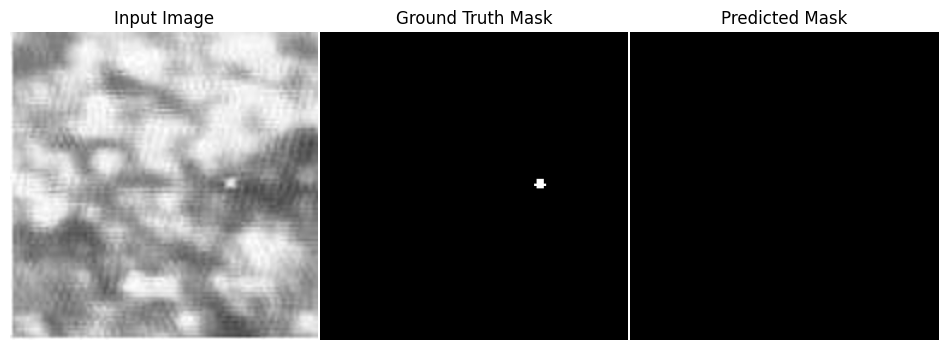

Test F1: 0.6007649302482605


In [5]:
import torch
test2dataloader = get_testMDvsFAdata_loaderst(mode = 'test', batch_size=batch_size)
test2_loader = test2dataloader['test']
# 加载模型
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # 自动选择 GPU 或 CPU
model = AttentionUNet()
model.load_state_dict(torch.load('last_model.pth', map_location=device, weights_only=True))
#model.load_state_dict(torch.load('best_model.pth', map_location=device))  # 加载权重，并确保权重在正确设备上
model2 = model.to(device)  # 将模型移动到 GPU 或 CPU

# 定义损失函数
criterion = FocalLoss()  # 根据任务选择适当的损失函数

# 测试模型并计算 F1 指标
test2_loss, test2_f1, test2_dice = testMDvsFA_model(model2, test2_loader, criterion, threshold=0.5, device=device)

# 可视化预测结果
visualize_predictions(model2, test2_loader, threshold=0.5, device=device, num_images=5)

# 打印测试集的 Dice 指标
print(f"Test F1: {test2_dice}")

## 测试SRIST

/tmp/ipykernel_1739/1703896085.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('last_model.pth'))  # 加载保存的模型权重
Testing: 100%|██████████|

Test Loss: 0.0016
Test F1 Score: 0.6648


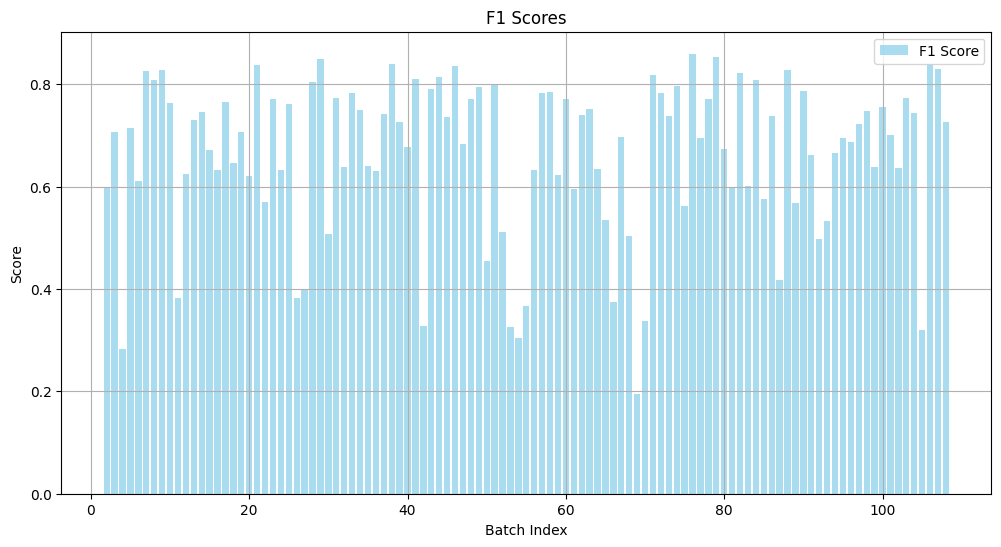

<Figure size 1200x400 with 0 Axes>

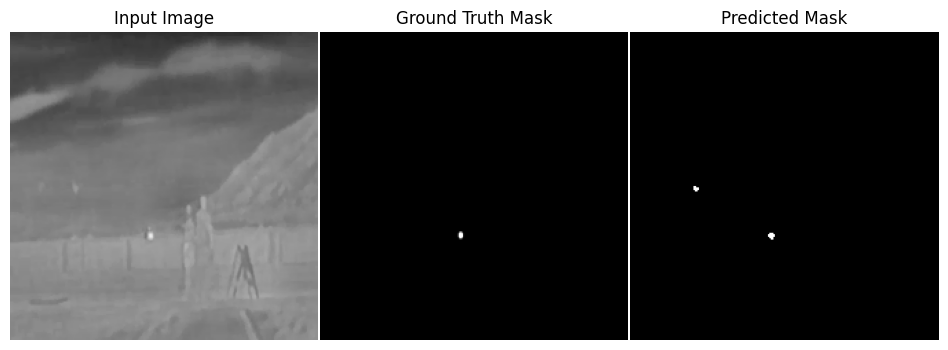

<Figure size 1200x400 with 0 Axes>

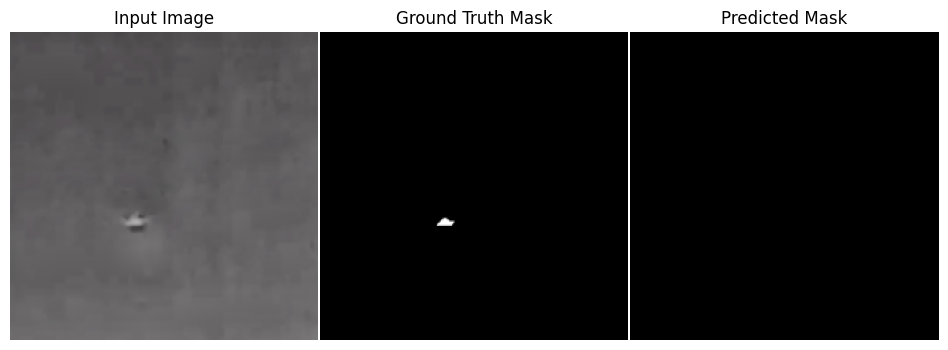

<Figure size 1200x400 with 0 Axes>

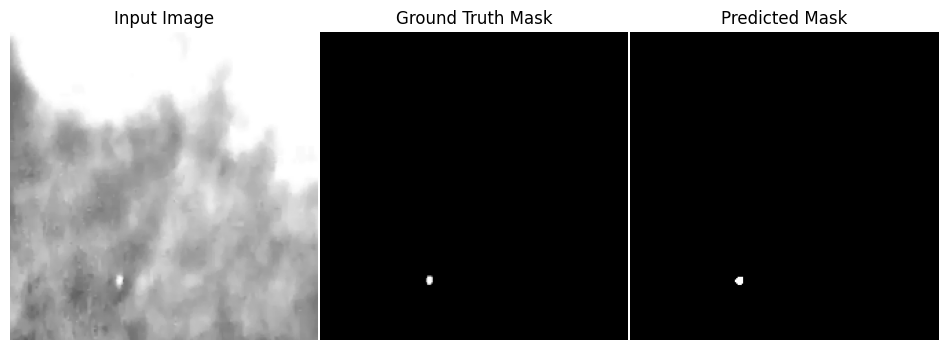

<Figure size 1200x400 with 0 Axes>

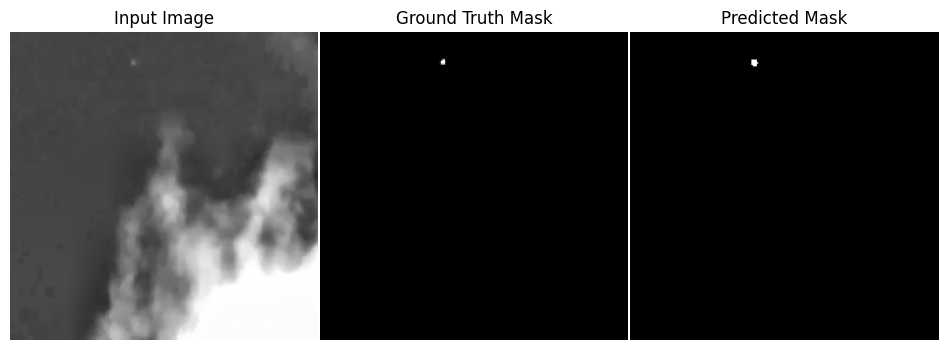

<Figure size 1200x400 with 0 Axes>

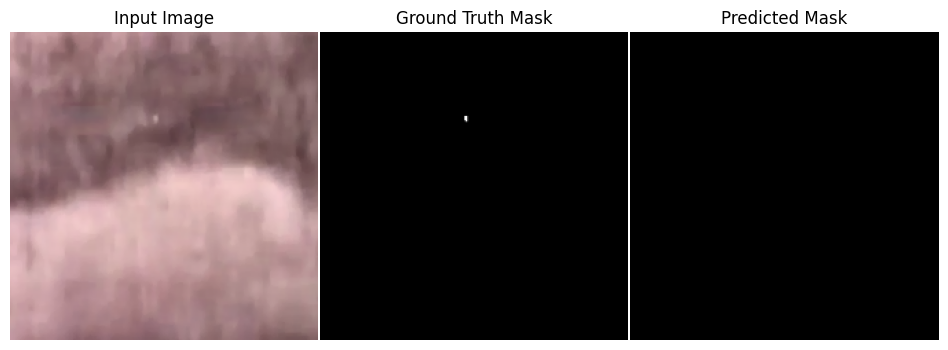

In [6]:
test1dataloader = get_testSRISTdata_loaderst(mode = 'test', batch_size=batch_size)
test_loader = test1dataloader['test']

# 假设测试数据集的 DataLoader 为 test_loader
# 加载保存的模型权重
model = AttentionUNet()
model.load_state_dict(torch.load('last_model.pth'))  # 加载保存的模型权重
#model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu')))

# 定义损失函数
criterion = FocalLoss()  # 根据任务选择适当的损失函数

# 测试模型并计算 F1 指标
test_loss, test_f1 ,test_dice = testSRIST_model(model, test_loader, criterion, threshold=0.5, device='cuda:0')

# 可视化预测结果
visualize_predictions(model, test_loader, threshold=0.5, device='cuda:0', num_images=5)
#print(test_dice)